In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import random


# 학습용 정상인 폐사진 전처리

In [2]:
train_x=[]
#path는 사용자 설정
path='/Users/suminbae/Python-Workspace/kaggle/chest_xray/train/NORMAL/*.jpeg'

for filename in glob.glob(path):
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))
   

In [3]:
a=len(train_x) # 정상 사진 개수 1341
train_y=np.zeros(a)

## 정상 폐 사진  25개 추출 후 시각화

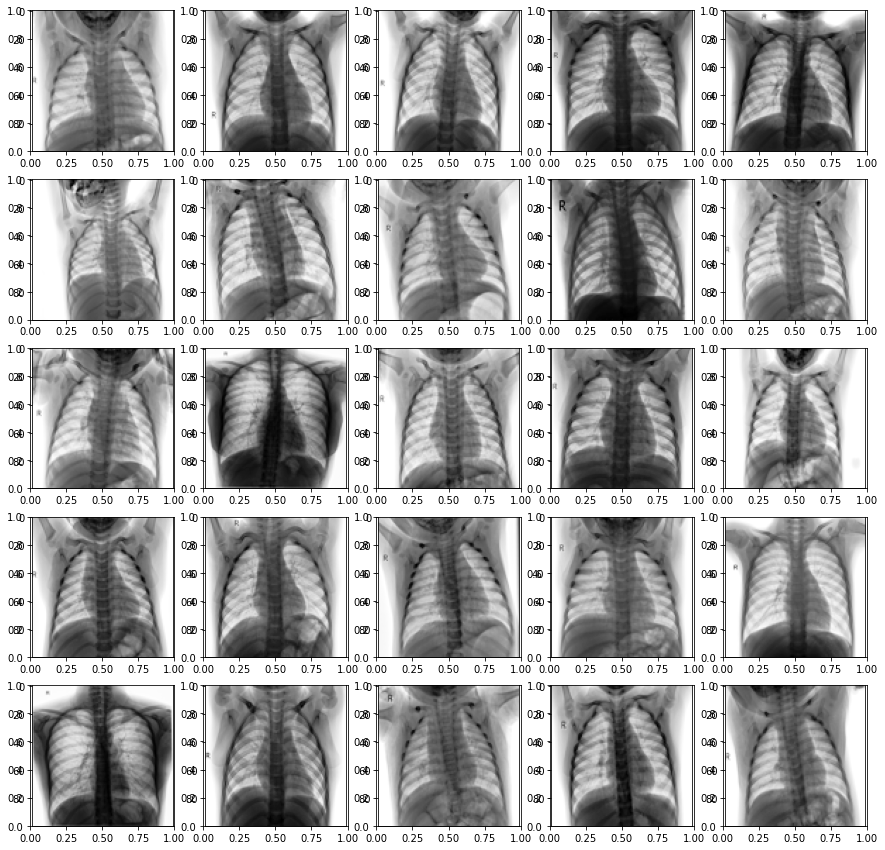

In [4]:
# plt.imshow(train_x[0].reshape(100,100),cmap='Greys')


fig,axes=plt.subplots(5,5,figsize=(15,15))# [width, height] (inches)

for i in range(1,26):
    
    axes=fig.add_subplot(5,5,i)
    axes.set_xticks([])
    axes.set_xticklabels([])

   
    axes.imshow(train_x[i].reshape(100,100),cmap='Greys')

# 학습용 폐렴 사진

In [5]:
path='/Users/suminbae/Python-Workspace/kaggle/chest_xray/train/PNEUMONIA//*.jpeg'

for filename in glob.glob(path):
    im=Image.open(filename).convert('L')
    img=im.resize((100,100))
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))
    
    

In [6]:
b=len(train_x) # 폐렴 사진 개수  a:1341 (정상) 폐렴 사진:3875개
train_y=np.concatenate((train_y,np.ones(b-a)))

In [7]:
train_x=np.stack(train_x)

### 폐렴 사진 시각화

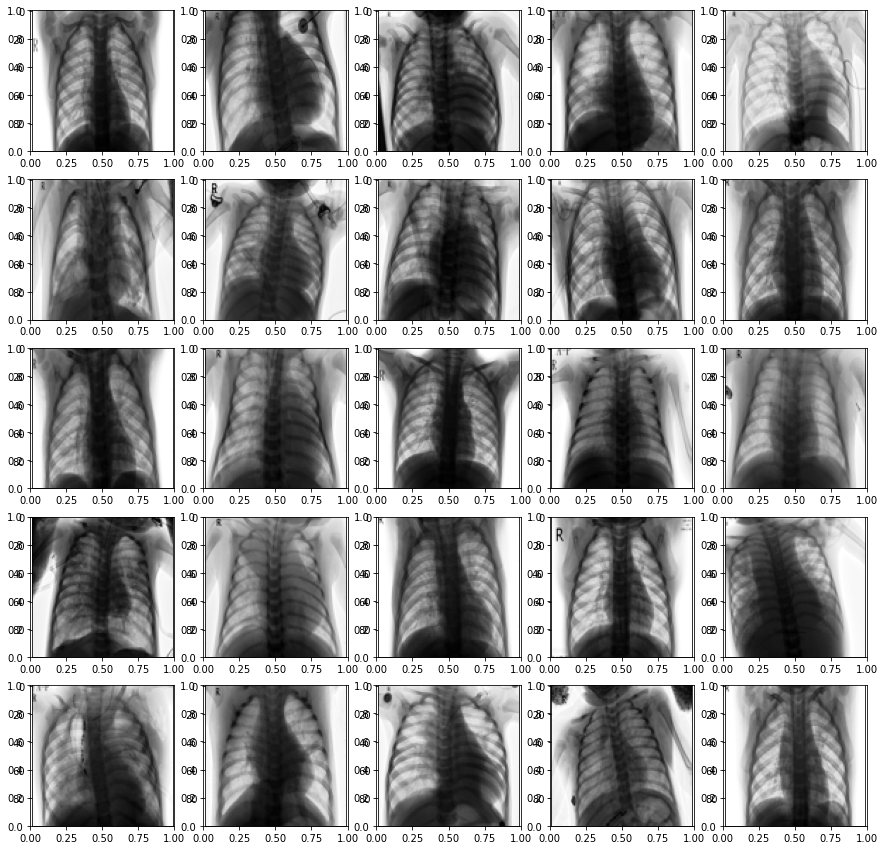

In [8]:

fig,axes=plt.subplots(5,5,figsize=(15,15))# [width, height] (inches)

for i in range(1,26):
    
    axes=fig.add_subplot(5,5,i)
    axes.set_xticks([])
    axes.set_xticklabels([])

   
    axes.imshow(train_x[i+2500].reshape(100,100),cmap='Greys')

# 평가용 데이터

In [9]:
val_x=[]
path='/Users/suminbae/Python-Workspace/kaggle/chest_xray/val/NORMAL/*.jpeg'

for filename in glob.glob(path):
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))

c=len(val_x)    
val_y=np.zeros(c)
    
path2='/Users/suminbae/Python-Workspace/kaggle/chest_xray/val/PNEUMONIA/*.jpeg'

for filename in glob.glob(path2):
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))
    
d=len(val_x)
val_y=np.concatenate((val_y,np.ones(d-c)))


In [10]:
val_x=np.stack(val_x)

# 테스트용 데이터 

In [11]:
test_x=[]
path='/Users/suminbae/Python-Workspace/kaggle/chest_xray/test/NORMAL/*.jpeg'

for filename in glob.glob(path):
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))
    
    
a=len(test_x)
test_y=np.zeros(a)


path2='/Users/suminbae/Python-Workspace/kaggle/chest_xray/test/PNEUMONIA/*.jpeg'

for filename in glob.glob(path2):
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))
    

b=len(test_x)
test_y=np.concatenate((test_y,np.ones(b-a)))
    



In [12]:
test_x=np.stack(test_x)

In [13]:
tx,vx,ty,vy=train_test_split(train_x,train_y)

# model  제작 conv->maxpool->dropout - >conv->maxpool -> dropout ->Fully Connected 3번의 모델

In [14]:
model=tf.keras.Sequential([
    layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu',padding='same'),
    layers.MaxPooling2D(pool_size=(4,4)),
    layers.Dropout(0.3),
    
    layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(pool_size=(8,8)),
    layers.Dropout(0.3),
    
    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
    
    
])

es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5)


In [15]:
history=model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [16]:
model.fit(tx,ty,validation_data=(vx,vy),batch_size=300,epochs=15,callbacks=[es])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3912 samples, validate on 1304 samples
Epoch 1/15
3912/3912 [==============================] - 35s 9ms/sample - loss: 4.3664 - acc: 0.6051 - val_loss: 0.6074 - val_acc: 0.7239
Epoch 2/15
3912/3912 [==============================] - 33s 8ms/sample - loss: 0.7112 - acc: 0.6825 - val_loss: 0.6297 - val_acc: 0.7393
Epoch 3/15
3912/3912 [==============================] - 32s 8ms/sample - loss: 0.5752 - acc: 0.7464 - val_loss: 0.6597 - val_acc: 0.7209
Epoch 4/15
3912/3912 [==============================] - 35s 9ms/sample - loss: 0.5432 - acc: 0.7418 - val_loss: 0.6331 - val_acc: 0.7025
Epoch 5/15
3912/3912 [==============================] - 32s 8ms/sample - loss: 0.5182 - acc: 0.7500 - val_loss: 0.5838 - val_acc: 0.7393
Epoch 6/15
3912/3912 [==============================] - 38s 10ms/sample - loss: 0.4913 - acc

# 대략 76퍼센트의 정확성을 가진다


In [19]:
model.evaluate(test_x,test_y)

624/624 [==============================] - 1s 2ms/sample - loss: 0.5218 - acc: 0.7612


[0.521756078188236, 0.76121795]